MLP - MultiLayer Perceptron

MLP é muito custosa para imagens

CNN - Convolutional Neural Networks



In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch 
from torchvision import datasets, transforms


MNIST = datasets.MNIST('.',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)
! ls



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

MNIST  sample_data


In [2]:
## Channel First: Padrão do PyTorch

dado, rotulo = MNIST[0]
print(type(dado), type(rotulo))

print("Pytorch imprime primeiro o dado de canal de cores para imagens")
print(dado.size(), rotulo) 



<class 'torch.Tensor'> <class 'int'>
Pytorch imprime primeiro o dado de canal de cores para imagens
torch.Size([1, 28, 28]) 7


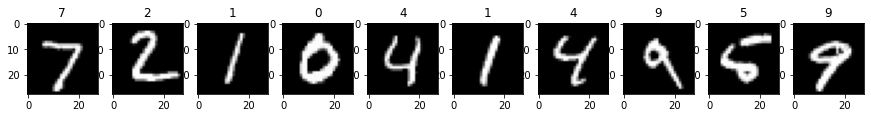

In [3]:
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
  dado, rotulo = MNIST[i]
  axes[i].imshow(dado[0], cmap='gray')
  axes[i].set_title(str(rotulo))


In [4]:
voc = datasets.VOCDetection('.', 
                            image_set='train', 
                            download=True, 
                            transform=transforms.ToTensor())

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./VOCtrainval_11-May-2012.tar to .


<class 'torch.Tensor'> <class 'dict'>
torch.Size([3, 442, 500])


{'annotation': {'filename': '2008_000008.jpg',
  'folder': 'VOC2012',
  'object': [{'bndbox': {'xmax': '471',
     'xmin': '53',
     'ymax': '420',
     'ymin': '87'},
    'difficult': '0',
    'name': 'horse',
    'occluded': '1',
    'pose': 'Left',
    'truncated': '0'},
   {'bndbox': {'xmax': '289', 'xmin': '158', 'ymax': '167', 'ymin': '44'},
    'difficult': '0',
    'name': 'person',
    'occluded': '0',
    'pose': 'Unspecified',
    'truncated': '1'}],
  'segmented': '0',
  'size': {'depth': '3', 'height': '442', 'width': '500'},
  'source': {'annotation': 'PASCAL VOC2008',
   'database': 'The VOC2008 Database',
   'image': 'flickr'}}}

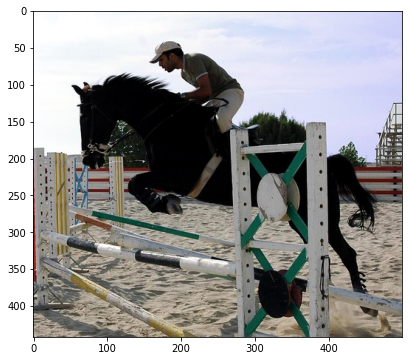

In [5]:
dado, rotulo = voc[0]

print(type(dado), type(rotulo))

print(dado.size())


dado = dado.permute(1, 2, 0)

plt.figure(figsize=(8, 6))
plt.imshow(dado)

rotulo

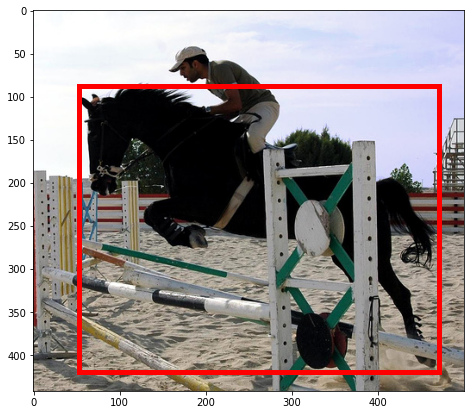

In [6]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax']) 
xmin = int(bbox['xmin']) 
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 7))
plt.imshow(dado)

rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
ax.add_patch(rect)

plt.show()

In [7]:
vocs = datasets.VOCSegmentation('./', 
                                year='2012',
                                image_set='val', 
                                download=True, 
                                transform=transforms.ToTensor(),
                                target_transform=transforms.ToTensor())

dado, rotulo = vocs[0]
print(type(dado), type(rotulo))

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to ./
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [8]:
print(dado.size(), rotulo.size())

torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


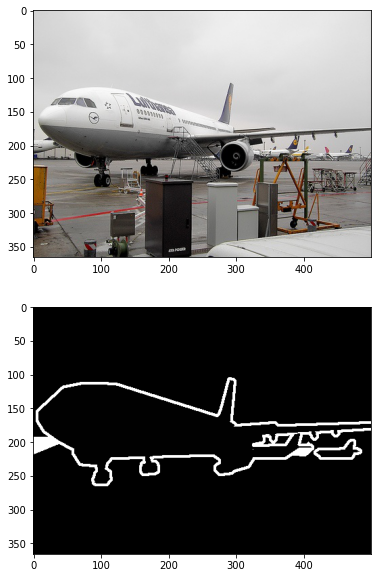

In [9]:
fig, axs = plt.subplots(2,1, figsize=(10, 10))
dado = dado.permute(1, 2, 0)

axs[0].imshow(dado)
axs[1].imshow(rotulo[0], cmap='gray')

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([3, 335, 500]) torch.Size([1, 335, 500])


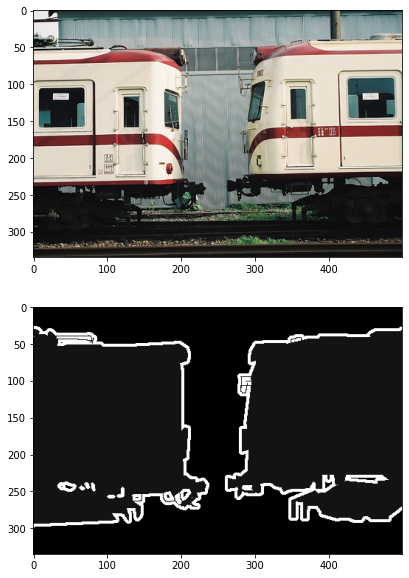

In [10]:
dado, rotulo = vocs[1]
print(type(dado), type(rotulo))
print(dado.size(), rotulo.size())
fig, axs = plt.subplots(2,1, figsize=(10, 10))
dado = dado.permute(1, 2, 0)
axs[0].imshow(dado)
axs[1].imshow(rotulo[0], cmap='gray')

